必要なモジュールをインポート

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm

エクセルデータをsampleDFに格納

In [3]:
sampleDF = pd.read_excel('サンプルデータ.xlsx', header=0, index_col=None)

数値型のフォーマットを2桁に指定

In [4]:
pd.options.display.float_format = '{:.2f}'.format

欠損値を落とす

In [5]:
sampleDF.dropna(how='any')

,Unnamed: 0,提出金(目的変数),見積年,回議書番号,提出日,工期FROM,工期TO,工期m,建築面積,延床面積,...,主要単価_本体鉄骨,設計分類,構造_コード1,構造_名称1,S,RC,SRC,他.1,用途分類,用途_コード1
1,2.00,288000000.00,2010.00,B01002-1,2010/04/01,2010/04,2010/10,6.00,464.13,1346.92,...,165000.00,一般,3.00,S,100.00,0.00,0.00,0.00,興行所･集会施設,1299.00
2,3.00,209000000.00,2010.00,B02002-1,2010/04/01,2010/12,2011/11,11.00,761.48,1502.23,...,158000.00,一般,3.00,S,100.00,0.00,0.00,0.00,生産施設,605.00
3,4.00,990000000.00,2010.00,B00003-1,2010/04/12,2010/06,2011/12,18.00,1212.86,5331.33,...,0.00,一般,1.00,RC,0.00,100.00,0.00,0.00,集合住宅,207.00
4,5.00,1093500000.00,2010.00,B01003-1,2010/04/12,2010/06,2011/07,13.00,1403.37,4944.17,...,0.00,一般,1.00,RC,0.00,100.00,0.00,0.00,医療保健施設,1002.00
5,6.00,2550000000.00,2010.00,B00008-1,2010/04/13,2010/05,2011/05,12.00,1801.79,9243.56,...,197000.00,一般,3.00,S,100.00,0.00,0.00,0.00,教育･研究施設,1110.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196.00,2450000000.00,2018.00,B80267-1,2019/03/01,2019/03,2020/03,12.00,879.09,3772.94,...,258300.00,当社,3.00,S,100.00,0.00,0.00,0.00,教育･研究施設,1101.00
1226,1227.00,16740000000.00,2019.00,B90058-1,2019/08/30,2019/08,2021/09,25.00,4786.59,31998.00,...,295000.00,当社,3.00,S,100.00,0.00,0.00,0.00,宿泊施設,901.00
1246,1247.00,19034149000.00,2019.00,B90115-1,2019/12/03,2020/12,2024/06,42.00,3740.78,47361.72,...,283910.00,指定書式あり,3.00,S,100.00,0.00,0.00,0.00,事務所,306.00
1248,1249.00,14370000000.00,2019.00,B90171-1,2019/12/10,2021/03,2023/06,27.00,1935.77,24887.16,...,291400.00,指定書式あり,3.00,S,100.00,0.00,0.00,0.00,事務所,301.00


In [6]:
sampleDF = sampleDF.dropna(how='any')

In [7]:
sampleDF

,Unnamed: 0,提出金(目的変数),見積年,回議書番号,提出日,工期FROM,工期TO,工期m,建築面積,延床面積,...,主要単価_本体鉄骨,設計分類,構造_コード1,構造_名称1,S,RC,SRC,他.1,用途分類,用途_コード1
1,2.00,288000000.00,2010.00,B01002-1,2010/04/01,2010/04,2010/10,6.00,464.13,1346.92,...,165000.00,一般,3.00,S,100.00,0.00,0.00,0.00,興行所･集会施設,1299.00
2,3.00,209000000.00,2010.00,B02002-1,2010/04/01,2010/12,2011/11,11.00,761.48,1502.23,...,158000.00,一般,3.00,S,100.00,0.00,0.00,0.00,生産施設,605.00
3,4.00,990000000.00,2010.00,B00003-1,2010/04/12,2010/06,2011/12,18.00,1212.86,5331.33,...,0.00,一般,1.00,RC,0.00,100.00,0.00,0.00,集合住宅,207.00
4,5.00,1093500000.00,2010.00,B01003-1,2010/04/12,2010/06,2011/07,13.00,1403.37,4944.17,...,0.00,一般,1.00,RC,0.00,100.00,0.00,0.00,医療保健施設,1002.00
5,6.00,2550000000.00,2010.00,B00008-1,2010/04/13,2010/05,2011/05,12.00,1801.79,9243.56,...,197000.00,一般,3.00,S,100.00,0.00,0.00,0.00,教育･研究施設,1110.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196.00,2450000000.00,2018.00,B80267-1,2019/03/01,2019/03,2020/03,12.00,879.09,3772.94,...,258300.00,当社,3.00,S,100.00,0.00,0.00,0.00,教育･研究施設,1101.00
1226,1227.00,16740000000.00,2019.00,B90058-1,2019/08/30,2019/08,2021/09,25.00,4786.59,31998.00,...,295000.00,当社,3.00,S,100.00,0.00,0.00,0.00,宿泊施設,901.00
1246,1247.00,19034149000.00,2019.00,B90115-1,2019/12/03,2020/12,2024/06,42.00,3740.78,47361.72,...,283910.00,指定書式あり,3.00,S,100.00,0.00,0.00,0.00,事務所,306.00
1248,1249.00,14370000000.00,2019.00,B90171-1,2019/12/10,2021/03,2023/06,27.00,1935.77,24887.16,...,291400.00,指定書式あり,3.00,S,100.00,0.00,0.00,0.00,事務所,301.00


入力時に存在しないカラムのリストを作成

In [8]:
noneed = ['コンクリート_数量','型枠_数量','鉄筋_数量','根切量','鉄骨量','外壁仕上面積','外壁見付面積','外壁建具面積','仮設','躯体','仕上','設備','外構','解体･その他','諸経費･設計料','配員延人月','円／坪','主要単価_コンクリート材ベース','主要単価_型枠_材工','主要単価_鉄筋材ベース','主要単価_鉄筋加工組立','主要単価_本体鉄骨']

入力時に存在しないカラムを落とす

In [9]:
sampleDF.drop(noneed,axis=1)

,Unnamed: 0,提出金(目的変数),見積年,回議書番号,提出日,工期FROM,工期TO,工期m,建築面積,延床面積,...,請負形式_名称,設計分類,構造_コード1,構造_名称1,S,RC,SRC,他.1,用途分類,用途_コード1
1,2.00,288000000.00,2010.00,B01002-1,2010/04/01,2010/04,2010/10,6.00,464.13,1346.92,...,積合,一般,3.00,S,100.00,0.00,0.00,0.00,興行所･集会施設,1299.00
2,3.00,209000000.00,2010.00,B02002-1,2010/04/01,2010/12,2011/11,11.00,761.48,1502.23,...,積合,一般,3.00,S,100.00,0.00,0.00,0.00,生産施設,605.00
3,4.00,990000000.00,2010.00,B00003-1,2010/04/12,2010/06,2011/12,18.00,1212.86,5331.33,...,積合,一般,1.00,RC,0.00,100.00,0.00,0.00,集合住宅,207.00
4,5.00,1093500000.00,2010.00,B01003-1,2010/04/12,2010/06,2011/07,13.00,1403.37,4944.17,...,入札,一般,1.00,RC,0.00,100.00,0.00,0.00,医療保健施設,1002.00
5,6.00,2550000000.00,2010.00,B00008-1,2010/04/13,2010/05,2011/05,12.00,1801.79,9243.56,...,積合,一般,3.00,S,100.00,0.00,0.00,0.00,教育･研究施設,1110.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196.00,2450000000.00,2018.00,B80267-1,2019/03/01,2019/03,2020/03,12.00,879.09,3772.94,...,設計特命,当社,3.00,S,100.00,0.00,0.00,0.00,教育･研究施設,1101.00
1226,1227.00,16740000000.00,2019.00,B90058-1,2019/08/30,2019/08,2021/09,25.00,4786.59,31998.00,...,設計特命,当社,3.00,S,100.00,0.00,0.00,0.00,宿泊施設,901.00
1246,1247.00,19034149000.00,2019.00,B90115-1,2019/12/03,2020/12,2024/06,42.00,3740.78,47361.72,...,設計入札,指定書式あり,3.00,S,100.00,0.00,0.00,0.00,事務所,306.00
1248,1249.00,14370000000.00,2019.00,B90171-1,2019/12/10,2021/03,2023/06,27.00,1935.77,24887.16,...,特命,指定書式あり,3.00,S,100.00,0.00,0.00,0.00,事務所,301.00


カラムを落としたデータをsampleDF2に確認

In [10]:
sampleDF2 = sampleDF.drop(noneed,axis=1)

In [11]:
sampleDF2

,Unnamed: 0,提出金(目的変数),見積年,回議書番号,提出日,工期FROM,工期TO,工期m,建築面積,延床面積,...,請負形式_名称,設計分類,構造_コード1,構造_名称1,S,RC,SRC,他.1,用途分類,用途_コード1
1,2.00,288000000.00,2010.00,B01002-1,2010/04/01,2010/04,2010/10,6.00,464.13,1346.92,...,積合,一般,3.00,S,100.00,0.00,0.00,0.00,興行所･集会施設,1299.00
2,3.00,209000000.00,2010.00,B02002-1,2010/04/01,2010/12,2011/11,11.00,761.48,1502.23,...,積合,一般,3.00,S,100.00,0.00,0.00,0.00,生産施設,605.00
3,4.00,990000000.00,2010.00,B00003-1,2010/04/12,2010/06,2011/12,18.00,1212.86,5331.33,...,積合,一般,1.00,RC,0.00,100.00,0.00,0.00,集合住宅,207.00
4,5.00,1093500000.00,2010.00,B01003-1,2010/04/12,2010/06,2011/07,13.00,1403.37,4944.17,...,入札,一般,1.00,RC,0.00,100.00,0.00,0.00,医療保健施設,1002.00
5,6.00,2550000000.00,2010.00,B00008-1,2010/04/13,2010/05,2011/05,12.00,1801.79,9243.56,...,積合,一般,3.00,S,100.00,0.00,0.00,0.00,教育･研究施設,1110.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196.00,2450000000.00,2018.00,B80267-1,2019/03/01,2019/03,2020/03,12.00,879.09,3772.94,...,設計特命,当社,3.00,S,100.00,0.00,0.00,0.00,教育･研究施設,1101.00
1226,1227.00,16740000000.00,2019.00,B90058-1,2019/08/30,2019/08,2021/09,25.00,4786.59,31998.00,...,設計特命,当社,3.00,S,100.00,0.00,0.00,0.00,宿泊施設,901.00
1246,1247.00,19034149000.00,2019.00,B90115-1,2019/12/03,2020/12,2024/06,42.00,3740.78,47361.72,...,設計入札,指定書式あり,3.00,S,100.00,0.00,0.00,0.00,事務所,306.00
1248,1249.00,14370000000.00,2019.00,B90171-1,2019/12/10,2021/03,2023/06,27.00,1935.77,24887.16,...,特命,指定書式あり,3.00,S,100.00,0.00,0.00,0.00,事務所,301.00


In [12]:
sampleDF2["請負形式_名称"].unique()

array(['積合', '入札', '設計特命', '設計積合', '特命', '随契', '-', '設計入札'], dtype=object)

In [13]:
sampleDF2["用途分類"].unique()

array(['興行所･集会施設', '生産施設', '集合住宅', '医療保健施設', '教育･研究施設', '宿泊施設', '展示施設',
       '事務所', '社寺教会', '流通施設', '発電･変電施設', '物販店舗', '空港施設', '上水道', '原子力関連施設',
       '独立住宅', '体育施設', '通信施設', '飲食店', 'ﾚｼﾞｬｰ娯楽施設', '鉄道施設', '駐車場施設',
       '道路施設', '下水道', '放送施設'], dtype=object)

In [14]:
import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

In [15]:
display(sampleDF2)
print(sampleDF2.shape)

,Unnamed: 0,提出金(目的変数),見積年,回議書番号,提出日,工期FROM,工期TO,工期m,建築面積,延床面積,...,請負形式_名称,設計分類,構造_コード1,構造_名称1,S,RC,SRC,他.1,用途分類,用途_コード1
1,2.00,288000000.00,2010.00,B01002-1,2010/04/01,2010/04,2010/10,6.00,464.13,1346.92,...,積合,一般,3.00,S,100.00,0.00,0.00,0.00,興行所･集会施設,1299.00
2,3.00,209000000.00,2010.00,B02002-1,2010/04/01,2010/12,2011/11,11.00,761.48,1502.23,...,積合,一般,3.00,S,100.00,0.00,0.00,0.00,生産施設,605.00
3,4.00,990000000.00,2010.00,B00003-1,2010/04/12,2010/06,2011/12,18.00,1212.86,5331.33,...,積合,一般,1.00,RC,0.00,100.00,0.00,0.00,集合住宅,207.00
4,5.00,1093500000.00,2010.00,B01003-1,2010/04/12,2010/06,2011/07,13.00,1403.37,4944.17,...,入札,一般,1.00,RC,0.00,100.00,0.00,0.00,医療保健施設,1002.00
5,6.00,2550000000.00,2010.00,B00008-1,2010/04/13,2010/05,2011/05,12.00,1801.79,9243.56,...,積合,一般,3.00,S,100.00,0.00,0.00,0.00,教育･研究施設,1110.00


(909, 35)


In [16]:
import category_encoders as ce

ワンホットエンコーディングするカラムを指定

In [17]:
onehot_cols = '請負形式_名称'

請負形式_名称をワンホットエンコーディング

In [18]:
ohe = ce.OneHotEncoder(cols=onehot_cols, drop_invariant=True)
ohe_df = ohe.fit_transform(sampleDF2[onehot_cols])

C:\Users\ISLARAI\anaconda3\envs\HW\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [19]:
ohe_df

,請負形式_名称_1,請負形式_名称_2,請負形式_名称_3,請負形式_名称_4,請負形式_名称_5,請負形式_名称_6,請負形式_名称_7,請負形式_名称_8
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1195,0,0,1,0,0,0,0,0
1226,0,0,1,0,0,0,0,0
1246,0,0,0,0,0,0,0,1
1248,0,0,0,0,1,0,0,0


ワンホットエンコーディングしたものを、元の請負形式と結合

In [20]:
onehot_ukeoi_name = pd.concat([sampleDF2[onehot_cols], ohe_df], axis=1)

In [21]:
onehot_ukeoi_name

,請負形式_名称,請負形式_名称_1,請負形式_名称_2,請負形式_名称_3,請負形式_名称_4,請負形式_名称_5,請負形式_名称_6,請負形式_名称_7,請負形式_名称_8
1,積合,1,0,0,0,0,0,0,0
2,積合,1,0,0,0,0,0,0,0
3,積合,1,0,0,0,0,0,0,0
4,入札,0,1,0,0,0,0,0,0
5,積合,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1195,設計特命,0,0,1,0,0,0,0,0
1226,設計特命,0,0,1,0,0,0,0,0
1246,設計入札,0,0,0,0,0,0,0,1
1248,特命,0,0,0,0,1,0,0,0


In [22]:
onehotcols2 = ['設計分類','構造_名称1','用途分類']

In [23]:
ohe2 = ce.OneHotEncoder(cols=onehotcols2, drop_invariant=True)
ohe_df2 = ohe2.fit_transform(sampleDF2[onehotcols2])

C:\Users\ISLARAI\anaconda3\envs\HW\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [24]:
ohe_df2

,設計分類_1,設計分類_2,設計分類_3,設計分類_4,構造_名称1_1,構造_名称1_2,構造_名称1_3,構造_名称1_4,構造_名称1_5,構造_名称1_6,...,用途分類_16,用途分類_17,用途分類_18,用途分類_19,用途分類_20,用途分類_21,用途分類_22,用途分類_23,用途分類_24,用途分類_25
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1226,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1248,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
raw_data = pd.concat([sampleDF2, ohe_df, ohe_df2], axis=1)

In [26]:
raw_data

,Unnamed: 0,提出金(目的変数),見積年,回議書番号,提出日,工期FROM,工期TO,工期m,建築面積,延床面積,...,用途分類_16,用途分類_17,用途分類_18,用途分類_19,用途分類_20,用途分類_21,用途分類_22,用途分類_23,用途分類_24,用途分類_25
1,2.00,288000000.00,2010.00,B01002-1,2010/04/01,2010/04,2010/10,6.00,464.13,1346.92,...,0,0,0,0,0,0,0,0,0,0
2,3.00,209000000.00,2010.00,B02002-1,2010/04/01,2010/12,2011/11,11.00,761.48,1502.23,...,0,0,0,0,0,0,0,0,0,0
3,4.00,990000000.00,2010.00,B00003-1,2010/04/12,2010/06,2011/12,18.00,1212.86,5331.33,...,0,0,0,0,0,0,0,0,0,0
4,5.00,1093500000.00,2010.00,B01003-1,2010/04/12,2010/06,2011/07,13.00,1403.37,4944.17,...,0,0,0,0,0,0,0,0,0,0
5,6.00,2550000000.00,2010.00,B00008-1,2010/04/13,2010/05,2011/05,12.00,1801.79,9243.56,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196.00,2450000000.00,2018.00,B80267-1,2019/03/01,2019/03,2020/03,12.00,879.09,3772.94,...,0,0,0,0,0,0,0,0,0,0
1226,1227.00,16740000000.00,2019.00,B90058-1,2019/08/30,2019/08,2021/09,25.00,4786.59,31998.00,...,0,0,0,0,0,0,0,0,0,0
1246,1247.00,19034149000.00,2019.00,B90115-1,2019/12/03,2020/12,2024/06,42.00,3740.78,47361.72,...,0,0,0,0,0,0,0,0,0,0
1248,1249.00,14370000000.00,2019.00,B90171-1,2019/12/10,2021/03,2023/06,27.00,1935.77,24887.16,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y_raw = raw_data['提出金(目的変数)']

In [28]:
y_raw

1        288000000.00
2        209000000.00
3        990000000.00
4       1093500000.00
5       2550000000.00
            ...      
1195    2450000000.00
1226   16740000000.00
1246   19034149000.00
1248   14370000000.00
1250    4788140000.00
Name: 提出金(目的変数), Length: 909, dtype: float64

In [29]:
raw_noneed = ['Unnamed: 0','提出金(目的変数)','見積年','回議書番号','提出日','工期FROM','工期TO','その他設備','請負形式_名称','設計分類','構造_コード1','構造_名称1','用途分類','用途_コード1']

In [30]:
x_raw = raw_data.drop(raw_noneed,axis=1)

In [31]:
x_raw

,工期m,建築面積,延床面積,1ﾌﾛｱ面積,施工面積,坪単価,B,F,P,階数,...,用途分類_16,用途分類_17,用途分類_18,用途分類_19,用途分類_20,用途分類_21,用途分類_22,用途分類_23,用途分類_24,用途分類_25
1,6.00,464.13,1346.92,448.97,0.00,895093.87,0.00,3.00,0.00,3.00,...,0,0,0,0,0,0,0,0,0,0
2,11.00,761.48,1502.23,500.74,0.00,603620.52,0.00,3.00,0.00,3.00,...,0,0,0,0,0,0,0,0,0,0
3,18.00,1212.86,5331.33,888.55,0.00,659627.94,1.00,5.00,0.00,6.00,...,0,0,0,0,0,0,0,0,0,0
4,13.00,1403.37,4944.17,988.83,5112.62,1007213.49,0.00,5.00,0.00,5.00,...,0,0,0,0,0,0,0,0,0,0
5,12.00,1801.79,9243.56,1540.59,9311.60,1232718.86,0.00,6.00,0.00,6.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,12.00,879.09,3772.94,538.99,4294.17,1918227.00,1.00,5.00,1.00,7.00,...,0,0,0,0,0,0,0,0,0,0
1226,25.00,4786.59,31998.00,1999.88,33461.02,1639575.61,1.00,14.00,1.00,16.00,...,0,0,0,0,0,0,0,0,0,0
1246,42.00,3740.78,47361.72,3382.98,51979.20,1486641.90,2.00,11.00,1.00,14.00,...,0,0,0,0,0,0,0,0,0,0
1248,27.00,1935.77,24887.16,1309.85,28853.49,1876449.71,1.00,16.00,2.00,19.00,...,0,0,0,0,0,0,0,0,0,0


In [128]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [148]:
pca = PCA(n_components=2)
pca.fit(x_raw)

PCA(n_components=2)

In [149]:
print(pca.components_)

[[ 4.24038138e-10  1.48672352e-07  2.10798295e-06  7.12688365e-08
   1.73354381e-06 -3.81217483e-07  3.74794034e-11  3.95175786e-10
   2.10726612e-11  4.53727851e-10 -1.89556090e-12 -2.05158190e-12
  -1.99640204e-12  1.92508404e-12  6.98004421e-12 -7.31438964e-15
   1.00000000e+00  1.76939684e-10 -3.76253348e-10  2.64623550e-11
   1.72851309e-10  2.54538738e-13  7.41709322e-14 -2.45278708e-12
   2.35072017e-12 -9.48889190e-13 -8.50936126e-14 -3.26383731e-14
   8.39978418e-13 -6.61337276e-12  2.63838048e-12 -2.37055240e-12
   6.34554467e-12  1.00165585e-12 -4.64930746e-12  1.12483997e-12
  -2.90436855e-13  2.64623550e-13  5.08954689e-13  5.29675001e-13
   3.72457350e-13  3.87848171e-13  1.96848900e-13 -8.10474549e-14
  -3.21744168e-14  3.28184595e-13  3.37878110e-13  1.28965784e-14
  -6.39265544e-13  1.19385193e-12 -1.94328415e-12 -2.31959131e-12
  -1.74337990e-13 -5.42812445e-13  5.35813234e-12 -9.63063916e-13
   3.12748632e-13  2.73147099e-14  2.71026004e-13  9.16736850e-15
  -7.23196

In [150]:
print(pca.explained_variance_)

[1.82924425e+20 3.75156557e+12]


In [188]:
pca = PCA(n_components=3)
pca.fit(x_raw)
X_PCA = pca.fit_transform(x_raw)
print("元データ",x_raw.shape)
print("削減データ",X_PCA.shape)

元データ (909, 72)
削減データ (909, 3)


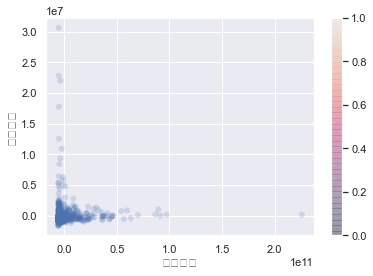

In [190]:
%matplotlib inline
plt.scatter(X_PCA[:, 0], X_PCA[:, 1],
           edgecolors='none', alpha=0.2,)
plt.xlabel('主成分１')
plt.ylabel('主成分２')
plt.colorbar();

In [191]:
sns.pairplot(X_PCA)

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

In [192]:
pd.Series(X_PCA)

Exception: Data must be 1-dimensional

In [193]:
X_PCA_DF = pd.DataFrame(X_PCA)

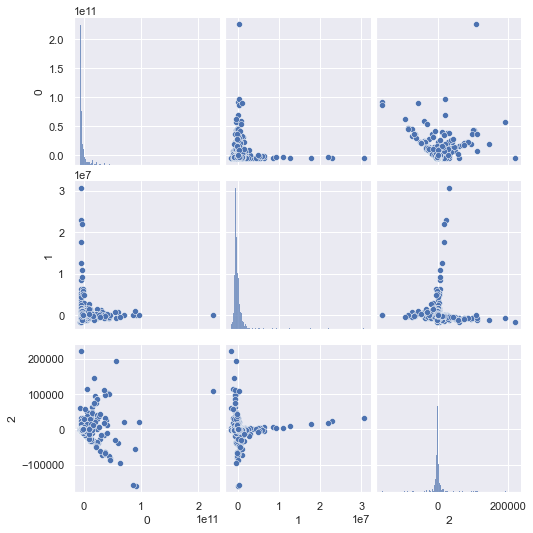

In [194]:
sns.pairplot(X_PCA_DF)

In [195]:
X_PCA_DF

,0,1,2
0,-5456851910.65,-697747.64,-2877.92
1,-5547251910.54,-989255.77,-2897.51
2,-4757751910.56,-932949.09,-3275.54
3,-4315151910.68,-585196.79,681.49
4,-2374651910.76,-358952.82,1814.44
...,...,...,...
904,-3632251911.04,326080.86,-1184.38
905,10048548089.13,52641.34,3565.62
906,15477448089.23,-98233.39,13087.42
907,8305048089.02,288856.40,825.31


In [196]:
X_PCA_DF.'0'

SyntaxError: invalid syntax (<ipython-input-196-c05901022f11>, line 1)

In [197]:
X_PCA_DF[X_PCA_DF.0 < 10048548089] 

SyntaxError: invalid syntax (<ipython-input-197-4a48a4815db6>, line 1)

In [198]:
X_PCA_DF[X_PCA_DF.0>10048548089]

SyntaxError: invalid syntax (<ipython-input-198-10c88cd2088c>, line 1)

In [199]:
X_PCA_DF[X_PCA_DF[0] < 5048548089]

,0,1,2
0,-5456851910.65,-697747.64,-2877.92
1,-5547251910.54,-989255.77,-2897.51
2,-4757751910.56,-932949.09,-3275.54
3,-4315151910.68,-585196.79,681.49
4,-2374651910.76,-358952.82,1814.44
...,...,...,...
898,-3816551911.29,972887.97,-1360.99
899,-1083451910.96,141404.25,-276.10
901,-2556151911.09,469874.34,-1200.71
904,-3632251911.04,326080.86,-1184.38


In [200]:
X_PCA_DF0 = X_PCA_DF[X_PCA_DF[0] < 5048548089]

In [201]:
X_PCA_DF0[X_PCA_DF0[1] < 52641]

,0,1,2
0,-5456851910.65,-697747.64,-2877.92
1,-5547251910.54,-989255.77,-2897.51
2,-4757751910.56,-932949.09,-3275.54
3,-4315151910.68,-585196.79,681.49
4,-2374651910.76,-358952.82,1814.44
...,...,...,...
891,-4025151910.65,-657901.61,85.10
892,-3394551910.52,-996888.85,-965.74
894,-3662551910.86,-126210.98,-165.62
897,-132151910.89,-18053.32,480.02


In [202]:
X_PCA_DF1 = X_PCA_DF0[X_PCA_DF0[1] < 52641]

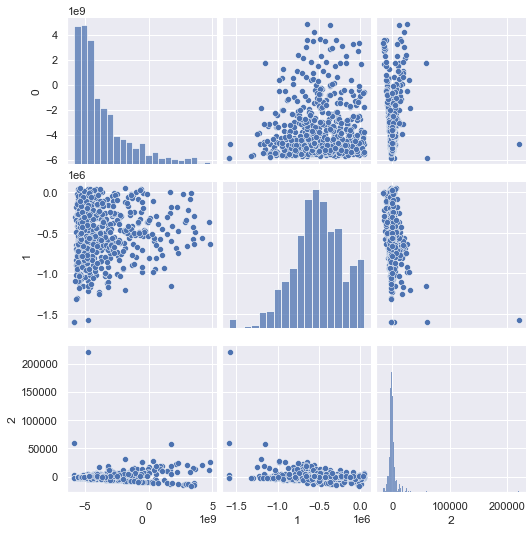

In [203]:
sns.pairplot(X_PCA_DF1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='0', ylabel='1'>

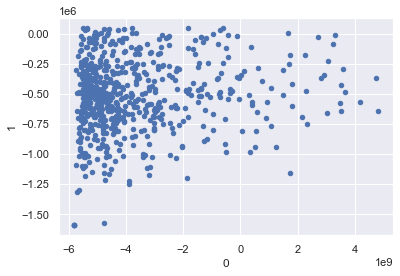

In [204]:
X_PCA_DF1.plot.scatter(x=0, y=1)

In [209]:
from sklearn.cluster import KMeans

kmeans_mod = KMeans(n_clusters=20, # クラスター数
            init='k-means++',       # 中心の設定
            n_init=100,               # 異なる初期値を用いたk-meansの実行回数 
            max_iter=300,            # 最大イテレーション回数  default: '300'
            tol=1e-04,              # 収束と判定するための相対的な許容誤差 default: '1e-04'
            random_state=0) 

In [210]:
idx = kmeans_mod.fit_predict(X_PCA_DF1)

In [211]:
idx

array([ 5,  5, 17, 15, 12, 15, 17,  5, 15, 17,  7,  1,  5, 10, 15,  5, 10,
       10,  3,  3, 17,  3, 13,  3, 14, 17,  1, 17, 17,  8, 10, 12,  5, 17,
        3,  0, 17,  1,  5, 15, 15, 15, 10, 10, 13, 15,  6, 17, 10,  2, 17,
        6,  6,  5, 19,  5,  5, 10,  5,  5, 12, 13, 12, 10,  3, 18, 17, 18,
        3,  7,  7,  5, 18,  3, 13, 14, 13,  1, 15,  3,  5, 11, 18,  3, 14,
       10, 13,  5,  5, 13, 17, 10, 13, 10,  1, 14, 15, 13,  6,  3, 17,  7,
       10, 14, 17, 10,  5, 15,  3, 17,  2, 17,  2, 13,  6,  5, 13,  3,  8,
       12,  6,  5, 15, 14,  5, 15,  5,  6,  6, 15,  6, 17,  5,  6,  1, 10,
       13, 10,  5, 18,  3, 13,  1,  7, 16, 12, 10, 12, 10, 10,  6, 12, 17,
        5, 18, 17, 18, 10, 18, 17,  5, 10,  1, 11, 10,  5,  5, 12,  5, 15,
        5,  5,  0, 10,  5,  6, 10, 15, 10,  3,  5,  5, 10,  3,  5, 17,  4,
       17,  1, 14,  3, 19,  3,  5, 18, 10, 10, 10, 15, 18, 18,  5, 15, 18,
       10, 14,  5,  6,  5,  5,  5, 14,  1, 15, 10,  3, 12, 10,  5,  5, 17,
        1,  1,  1, 10, 11

<AxesSubplot:xlabel='0', ylabel='1'>

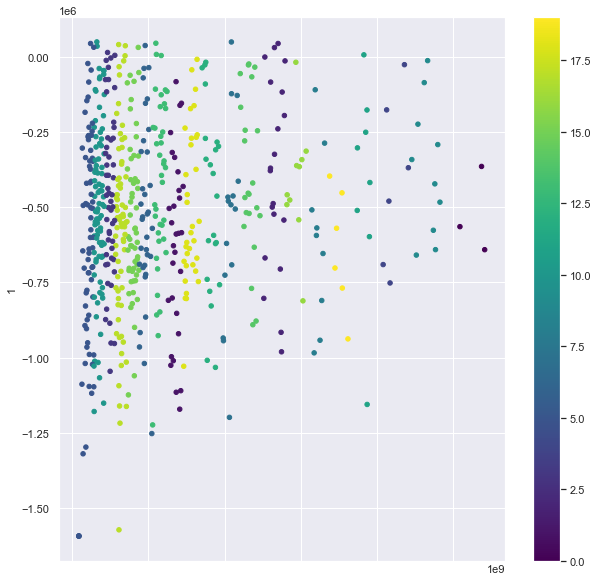

In [212]:
plt.rcParams["figure.figsize"] = (10, 10)
X_PCA_DF1.plot.scatter(x=0, y=1,c=idx,cmap='viridis')

In [213]:
import mglearn

ModuleNotFoundError: No module named 'mglearn'

# ここから回帰

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_raw, y_raw,test_size=0.20, random_state=1)

In [118]:
kaiki_raw

NameError: name 'kaiki_raw' is not defined

In [ ]:
import lightgbm as lgb
# モデルの学習
model = lgb.LGBMRegressor() # モデルのインスタンスの作成
model.fit(X_train, y_train) # モデルの学習

# テストデータの予測
y_pred = model.predict(X_test)

,CRIM,CRIM_pred
199,11780000000.00,1090684206.37
944,1475000000.00,1181568929.48
117,3483000000.00,22197968272.87
272,1950000000.00,2176554235.57
702,83700000000.00,95650219.45


Text(0.5, 1.0, 'y vs y_pred')

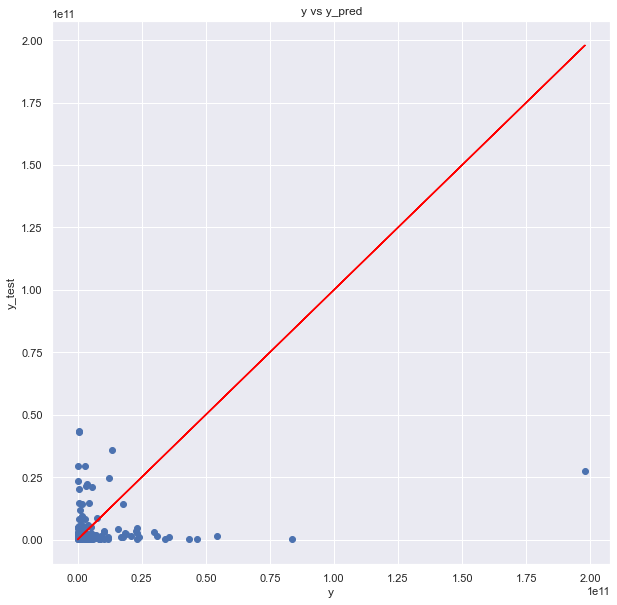

In [119]:
# 真値と予測値の表示
df_pred = pd.DataFrame({'CRIM':y_test,'CRIM_pred':y_pred})
display(df_pred)

# 散布図を描画(真値 vs 予測値)
plt.plot(y_test, y_test, color = 'red', label = 'x=y') # 直線y = x (真値と予測値が同じ場合は直線状に点がプロットされる)
plt.scatter(y_test, y_pred) # 散布図のプロット
plt.xlabel('y') # x軸ラベル
plt.ylabel('y_test') # y軸ラベル
plt.title('y vs y_pred') # グラフタイトル

In [120]:
# モデル評価
# rmse : 平均二乗誤差の平方根
mse = mean_squared_error(y_test, y_pred) # MSE(平均二乗誤差)の算出
rmse = np.sqrt(mse) # RSME = √MSEの算出
print('RMSE :',rmse)

#r2 : 決定係数
r2 = r2_score(y_test,y_pred)
print('R2 :',r2)

RMSE : 18253019801.161083
R2 : -0.06501359701738285


In [127]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression', # 目的 : 回帰  
        'metric': {'rmse'}, # 評価指標 : rsme(平均二乗誤差の平方根) 
        'learning_rate': 0.01,
        'num_leaves': 30,
        'min_data_in_leaf': 1,
        'num_iteration': 10000, #1000回学習
        'verbose': 0
}

# モデルの学習
model = lgb.train(params, # パラメータ
            train_set=lgb_train, # トレーニングデータの指定
            valid_sets=lgb_eval, # 検証データの指定
            early_stopping_rounds=100 # 100回ごとに検証精度の改善を検討　→ 精度が改善しないなら学習を終了(過学習に陥るのを防ぐ)
               )

# テストデータの予測
y_pred = model.predict(X_test)

C:\Users\ISLARAI\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's rmse: 1.77254e+10
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 1.76332e+10
[3]	valid_0's rmse: 1.75421e+10
[4]	valid_0's rmse: 1.74519e+10
[5]	valid_0's rmse: 1.73629e+10
[6]	valid_0's rmse: 1.7275e+10
[7]	valid_0's rmse: 1.71884e+10
[8]	valid_0's rmse: 1.71013e+10
[9]	valid_0's rmse: 1.70163e+10
[10]	valid_0's rmse: 1.69311e+10
[11]	valid_0's rmse: 1.68474e+10
[12]	valid_0's rmse: 1.6766e+10
[13]	valid_0's rmse: 1.6684e+10
[14]	valid_0's rmse: 1.66039e+10
[15]	valid_0's rmse: 1.65238e+10
[16]	valid_0's rmse: 1.6445e+10
[17]	valid_0's rmse: 1.63672e+10
[18]	valid_0's rmse: 1.629e+10
[19]	valid_0's rmse: 1.62141e+10
[20]	valid_0's rmse: 1.61376e+10
[21]	valid_0's rmse: 1.60634e+10
[22]	valid_0's rmse: 1.59892e+10
[23]	valid_0's rmse: 1.59169e+10
[24]	valid_0's rmse: 1.58441e+10
[25]	valid_0's rmse: 1.57734e+10
[26]	valid_0's rmse: 1.57023e+10
[27]	valid_0's rmse: 1.56323e+10
[28]	valid_0's rmse: 1.55628e+10
[29]	valid_0's rmse: 1.54951

,CRIM,CRIM_pred
199,11780000000.00,15103877985.62
944,1475000000.00,1264802888.39
117,3483000000.00,4285482307.04
272,1950000000.00,2239043069.36
702,83700000000.00,61796075473.21


Text(0.5, 1.0, 'y vs y_pred')

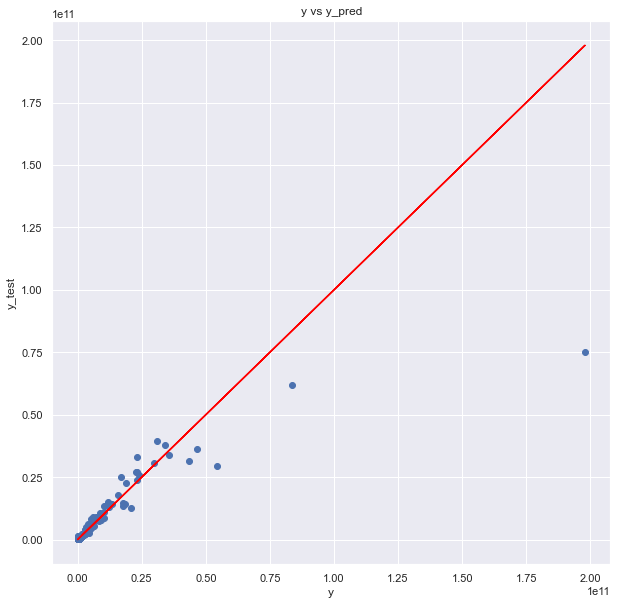

In [122]:
# 真値と予測値の表示
df_pred = pd.DataFrame({'CRIM':y_test,'CRIM_pred':y_pred})
display(df_pred)

# 散布図を描画(真値 vs 予測値)
plt.plot(y_test, y_test, color = 'red', label = 'x=y') # 直線y = x (真値と予測値が同じ場合は直線状に点がプロットされる)
plt.scatter(y_test, y_pred) # 散布図のプロット
plt.xlabel('y') # x軸ラベル
plt.ylabel('y_test') # y軸ラベル
plt.title('y vs y_pred') # グラフタイトル

In [123]:
from sklearn.metrics import mean_squared_error # モデル評価用(平均二乗誤差)
from sklearn.metrics import r2_score # モデル評価用(決定係数)

In [124]:
# モデル評価
# rmse : 平均二乗誤差の平方根
mse = mean_squared_error(y_test, y_pred) # MSE(平均二乗誤差)の算出
rmse = np.sqrt(mse) # RSME = √MSEの算出
print('RMSE :',rmse)

#r2 : 決定係数
r2 = r2_score(y_test,y_pred)
print('R2 :',r2)

RMSE : 9643363081.170204
R2 : 0.7027357108201431


In [125]:
from sklearn.model_selection import cross_val_score,KFold

scores = -cross_val_score(model, X_train, 
                          y_train,
                          scoring = 'neg_mean_squared_error',
                          cv = KFold(n_splits=3, shuffle=True)
                         )
scores = np.sqrt(scores)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))
# スコアの平均値
print('Average score: {}'.format(np.mean(scores)))

TypeError: estimator should be an estimator implementing 'fit' method, <lightgbm.basic.Booster object at 0x000002DE5BB0DB88> was passed

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

C:\Users\ISLARAI\anaconda3\envs\HW\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ISLARAI\anaconda3\envs\HW\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ISLARAI\anaconda3\envs\HW\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ISLARAI\anaconda3\envs\HW\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ISLARAI\anaconda3\envs\HW\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ISLARAI\anaconda3\envs\HW\lib\site-packages\matplotlib\backends\ba

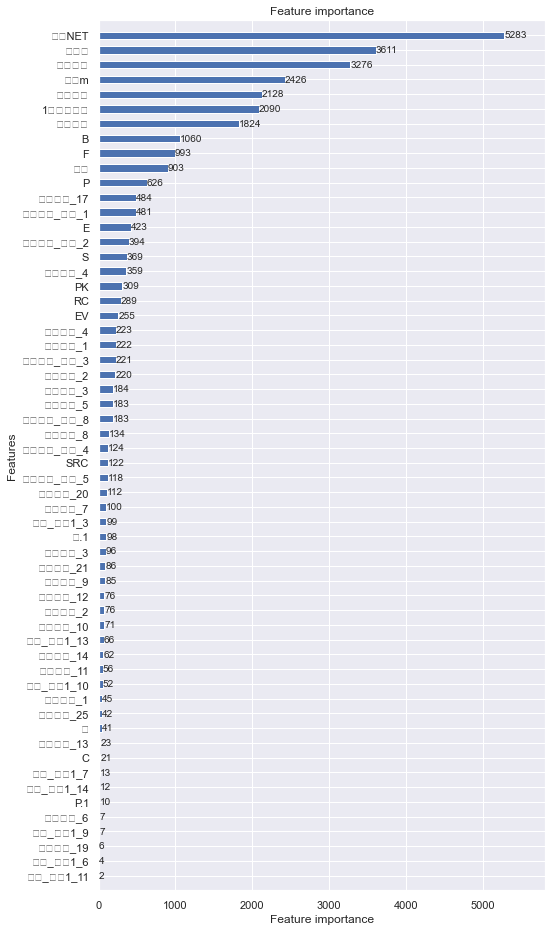

In [126]:
lgb.plot_importance(model, height=0.5, figsize=(8,16))